# Model Preprocessing (Logistic Regression)
## EV Survey 

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import numpy as np
#------------------------
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
#-------------------------
from os import listdir
from os.path import isfile, join
import pprint
import os 
from pathlib import Path

Objective
* Evaluate feature relationships
* Evaluate statistical relationship strengths using Pearson or other method

In [22]:
def seabornhist(size=(10,10), data=None, hue_c=None, x=None):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.histplot(x=x, data= data, hue = hue_c, ax=ax)
    plt.show()
    return

def seaborncount(size=(10,10), data=None, hue_c=None, x=None):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.countplot(x=x, data= data, hue = hue_c, ax=ax)
    plt.show()
    return

In [23]:
#collect info about current working directory and the location of the raw data pickle files

wd = Path(os.getcwd())
parent_dir = wd.parent.absolute()

In [24]:
#Data for the EV survey
filename = "processed_data.pkl"
filepath = f"{wd}\\{filename}"
df = pd.read_pickle(filepath)

In [25]:
df.head()

,response_id,months_owned,electric_range,discontinuance,surveyed_age,dist_1,trips_greater_200,safety_satisfaction,comfort_satisfaction,refuel_recharge_satisfaction,...,highest_charge_used_level 1 & level 2,"highest_charge_used_level 1, level 2 & dc fast",highest_charge_used_level 2,highest_charge_used_level 2 & dc fast,highest_charge_used_no charging,surveyed_gender_decline to state,surveyed_gender_female,surveyed_gender_genderqueer/non-binary,surveyed_gender_male,surveyed_gender_transfemale/transwoman
0,1.0,24.0,81.0,continued,25.0,13.92,0.0,5.0,5.0,5.0,...,0,0,1,0,0,0,0,0,1,0
6,7.0,14.0,87.0,continued,35.0,8.54,0.0,2.0,2.0,3.0,...,0,0,1,0,0,0,0,0,1,0
9,11.0,48.0,84.0,discontinued,55.0,12.91,0.0,3.0,2.0,3.0,...,0,0,0,0,1,0,0,0,1,0
10,12.0,30.0,81.0,continued,55.0,9.43,0.0,4.0,4.0,5.0,...,0,0,0,0,1,0,0,0,1,0
11,13.0,31.0,84.0,continued,35.0,16.32,0.0,5.0,5.0,5.0,...,1,0,0,0,0,0,0,0,1,0


In [26]:
df.columns.to_list()

['response_id',
 'months_owned',
 'electric_range',
 'discontinuance',
 'surveyed_age',
 'dist_1',
 'trips_greater_200',
 'safety_satisfaction',
 'comfort_satisfaction',
 'refuel_recharge_satisfaction',
 'performance_satisfaction',
 'env_impact_satisfaction',
 'purch_price_satisfaction',
 'reliability_satisfaction',
 'range_satisfaction',
 'charge_access_satisfaction',
 'adas_satisfaction',
 'household_income',
 'home_charge_type',
 'work_charge_type',
 'backup_vehicle_mpg',
 'finance_type',
 'model_year_1915',
 'model_year_2001',
 'model_year_2011',
 'model_year_2012',
 'model_year_2013',
 'model_year_2014',
 'model_year_2015',
 'model_year_2016',
 'model_year_2017',
 'model_year_2018',
 'Make_',
 'Make_audi',
 'Make_bmw',
 'Make_cadillac',
 'Make_chevrolet',
 'Make_chevy',
 'Make_fiat',
 'Make_ford',
 'Make_honda',
 'Make_hyundai',
 'Make_kia',
 'Make_mercedes-benz',
 'Make_mitsubishi',
 'Make_nissan',
 'Make_smart',
 'Make_tesla',
 'Make_toyota',
 'Make_volkswagen',
 'Make_volkswago

In [27]:
df_preprocessed = df

In [28]:
df_preprocessed.discontinuance
y = df_preprocessed.discontinuance
y.head()
df_preprocessed.drop(columns = 'discontinuance', inplace=True)
X = df_preprocessed

## Logistic Regression Pipeline

### Resample the minority class (Discontinued) using SMOTE-NC algorithm


In [29]:
X.columns.tolist()

['response_id',
 'months_owned',
 'electric_range',
 'surveyed_age',
 'dist_1',
 'trips_greater_200',
 'safety_satisfaction',
 'comfort_satisfaction',
 'refuel_recharge_satisfaction',
 'performance_satisfaction',
 'env_impact_satisfaction',
 'purch_price_satisfaction',
 'reliability_satisfaction',
 'range_satisfaction',
 'charge_access_satisfaction',
 'adas_satisfaction',
 'household_income',
 'home_charge_type',
 'work_charge_type',
 'backup_vehicle_mpg',
 'finance_type',
 'model_year_1915',
 'model_year_2001',
 'model_year_2011',
 'model_year_2012',
 'model_year_2013',
 'model_year_2014',
 'model_year_2015',
 'model_year_2016',
 'model_year_2017',
 'model_year_2018',
 'Make_',
 'Make_audi',
 'Make_bmw',
 'Make_cadillac',
 'Make_chevrolet',
 'Make_chevy',
 'Make_fiat',
 'Make_ford',
 'Make_honda',
 'Make_hyundai',
 'Make_kia',
 'Make_mercedes-benz',
 'Make_mitsubishi',
 'Make_nissan',
 'Make_smart',
 'Make_tesla',
 'Make_toyota',
 'Make_volkswagen',
 'Make_volkswagon',
 'Make_zero',
 

In [30]:
#SMOTE-NC looks for a mask to indicate which columns are categorical(True) and which are continuous (False)
## Link to Library: https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html

cat_mask =  np.array([True] * len(X.columns))
#Set the continuous variables to False state so the sampler knows how to handle them
cat_mask[0:2] = False
cat_mask

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [31]:
sm = SMOTENC(random_state=42, categorical_features=cat_mask)
X_res, y_res = sm.fit_resample(X, y)

In [32]:
y_res.value_counts()

discontinued    1530
continued       1530
Name: discontinuance, dtype: int64

Build the Regression pipeline

In [33]:
''' model = make_pipeline(
     RandomUnderSampler(random_state=0),
     XGBClassifier(random_state=0)
 ) '''

' model = make_pipeline(\n     RandomUnderSampler(random_state=0),\n     XGBClassifier(random_state=0)\n ) '

In [34]:
# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2, random_state=1)

In [35]:
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [36]:
clf = LogisticRegression(random_state = 42)
clf.fit(X_train_scaled, y_train)
y_pred= clf.predict(X_test_scaled)

In [37]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

   continued       0.82      0.76      0.79       327
discontinued       0.75      0.80      0.77       285

    accuracy                           0.78       612
   macro avg       0.78      0.78      0.78       612
weighted avg       0.79      0.78      0.78       612



In [38]:
#take a look at our hyperparameters
print('Parameters currently in use:\n')
print(clf.get_params())

Parameters currently in use:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [51]:
params = {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'fit_intercept': [True, False],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'warm_start': [True, False]
        }

In [52]:
logreg = LogisticRegression(random_state = 42)
logreg_random = RandomizedSearchCV(estimator = logreg, param_distributions = params, n_iter = 250, cv = 5,
                                verbose=2, random_state=42, n_jobs = -1)
logreg_random.fit(X_train_scaled, y_train)

C:\Users\mrpal\anaconda3\envs\ml_data_engineering\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 60 is smaller than n_iter=250. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\mrpal\anaconda3\envs\ml_data_engineering\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.77697008 0.77697008
        nan        nan 0.77982555 0.77982555 0.77656024 0.77656024
 0.77656024 0.77656024 0.77696924 0.77696924 0.77982722 0.77982722
 0.7818672  0.7818672         nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.7786044  0.7786044
        nan        nan 0.77982472 0.77982472 0.78309586 0.78309586
 0.78350486 0.78350486 0.78309586 0.78309586 0.78023538 0.78023538
 0.7818672  0.7818672         nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(
C:\Users\mrpal\anaconda3\envs\ml_data_engineering\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to co

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'warm_start': [True, False]},
                   random_state=42, verbose=2)

In [53]:
best_random = logreg_random.best_estimator_
best_random

LogisticRegression(fit_intercept=False, random_state=42, warm_start=True)

In [54]:
predictions = best_random.predict(X_test_scaled)
score       = best_random.score(X_test_scaled, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

   continued       0.81      0.77      0.79       327
discontinued       0.75      0.80      0.77       285

    accuracy                           0.78       612
   macro avg       0.78      0.78      0.78       612
weighted avg       0.78      0.78      0.78       612



In [55]:
'''feature_importance = best_random.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
'''

"feature_importance = best_random.feature_importances_\n# make importances relative to max importance\nfeature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]\nsorted_idx = np.argsort(feature_importance)[:30]\n\npos = np.arange(sorted_idx.shape[0]) + .5\nprint(pos.size)\nsorted_idx.size\nplt.figure(figsize=(10,10))\nplt.barh(pos, feature_importance[sorted_idx], align='center')\nplt.yticks(pos, X.columns[sorted_idx])\nplt.xlabel('Relative Importance')\nplt.title('Variable Importance')\nplt.show()\n"

In [56]:
ground_truth = np.array(y_test)
pred = np.array(predictions)
mapping = {'continued' : 1, 'discontinued' : 0}
ground_truth_mapped = [mapping[zi] for zi in ground_truth]
prediction_mapped = [mapping[zi] for zi in predictions]

In [57]:
fpr, tpr, thresholds = roc_curve(prediction_mapped, ground_truth_mapped, pos_label=1)
roc_auc = auc(fpr, tpr)

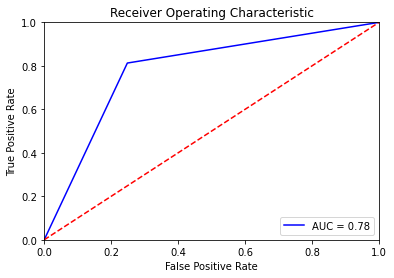

In [58]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Would it be meaningful to predict whether the first time adopters will continue / discontinue?